In [1]:
import numpy as np 
import os
import sys
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import h5py
import pandas as pd

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
int_dir = os.path.join(data_dir,'interim')
ext_dir = os.path.join(data_dir,'external')
src_dir = os.path.join(proj_dir,'src')
fig_dir = os.path.join(proj_dir,'reports','shallow_melting','figures')

sys.path.append(src_dir)

In [9]:
import scipy.io as sio
from scipy.interpolate import griddata

bfr_path = os.path.join(ext_dir,'reese','ButtressingFluxResponseNumbers.mat')
bfr = sio.loadmat(bfr_path)

In [8]:
import h5py

bedmap_path = os.path.join(proj_dir,'data','preprocessing','external','bedmap2','bedmap2.mat')
bedmap = {}
f = h5py.File(bedmap_path)
for k, v in f.items():
    bedmap[k] = np.flipud(np.rot90(np.array(v)))[::10,::10]

bedmap['elev_bed']*=-1
bedmap['zice'] = -(bedmap['thick']-bedmap['elev_surf'])

In [13]:
x_bed = bedmap['x'].flatten()
y_bed = bedmap['y'].flatten()
zice_bed = bedmap['zice'].flatten() 

zice_bfr = griddata((x_bed*1000,y_bed*1000),zice_bed,(bfr['x'],bfr['y']))

In [21]:
(~np.isnan(zice_bfr)).any()

True

In [32]:
ds = xr.Dataset(
    data_vars=dict(
        bfrn=(["y", "x"], bfr['BFRN']),
        zice=(["y", "x"], zice_bfr)),
    coords={'x':(['x'],bfr['x'][0]),
            'y':(['y'],bfr['y'][:,0])})

/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/matplotlib/colors.py:1207: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


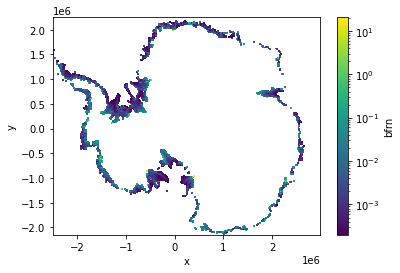

In [38]:
import matplotlib.colors as colors
ds.bfrn.where(ds.bfrn>0).plot(norm=colors.LogNorm(vmin=0,vmax=1))

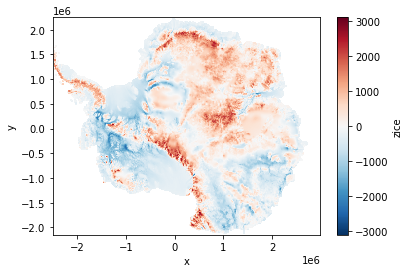

In [39]:
ds.zice.plot()

In [43]:
bins = np.arange(0,2400,100)
depths = ds.zice*-1
mask = ds.bfrn>0

bfr_db = (ds.bfrn.where(mask).groupby_bins(depths,bins).sum()).to_series()
#ismr_S = (sus_ds.wb.where(mask).groupby_bins(depths,bins).mean()).to_series()
#A_S = dA.groupby_bins(depths,bins).sum().to_series()/10**9
#bmb_S =  ((sus_ds.wb.where(mask)*ismr2bmb).groupby_bins(depths,bins).sum()).to_series()

In [52]:
bfr_cum = bfr_db.cumsum()/bfr_db.sum()

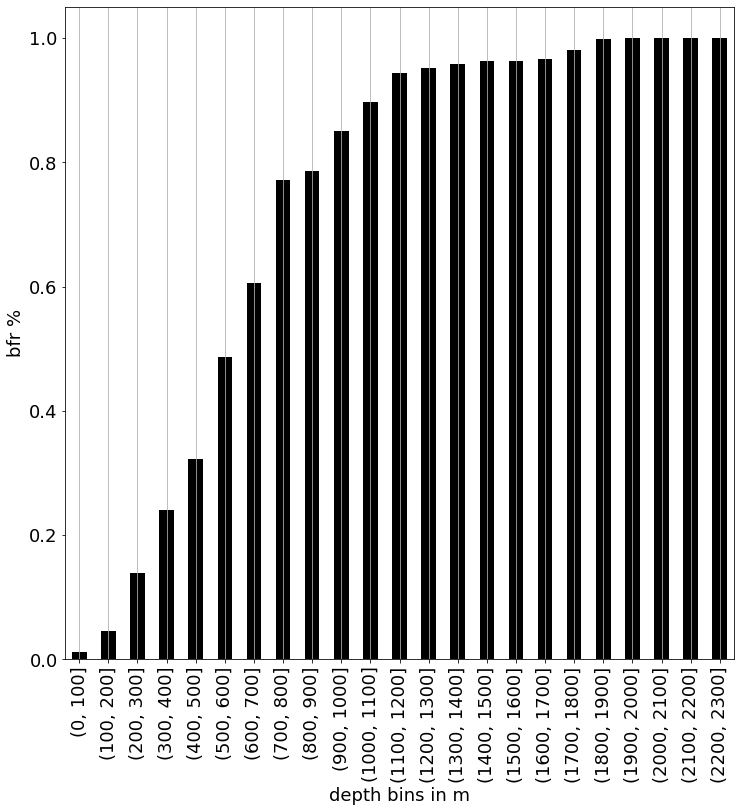

In [53]:
plt.rcParams.update({'font.size': 18})
plt.close()
fig,ax1 = plt.subplots(figsize=(12,12))

bfr_cum.plot.bar(ax=ax1,color='k')
ax1.set_ylabel('bfr %')
ax1.xaxis.grid(True)
ax1.set_xlabel('depth bins in m')
#ax1.set_ylim(0,5.2)
#ax2.set_ylim(0,300)
#ax3.set_ylim(0,440)
#plt.savefig(os.path.join(fig_dir,'susheelnew_depth_bins.png'),transparent=True,dpi=300,bbox_inches = "tight")
plt.show()

In [50]:
bfr_db.cumsum()/bfr_db.sum()

zice_bins
(0, 100]        0.012268
(100, 200]      0.045030
(200, 300]      0.138531
(300, 400]      0.240471
(400, 500]      0.322279
(500, 600]      0.487202
(600, 700]      0.606314
(700, 800]      0.771748
(800, 900]      0.785234
(900, 1000]     0.850913
(1000, 1100]    0.896361
(1100, 1200]    0.943661
(1200, 1300]    0.952291
(1300, 1400]    0.957857
(1400, 1500]    0.962393
(1500, 1600]    0.963108
(1600, 1700]    0.966424
(1700, 1800]    0.980092
(1800, 1900]    0.998880
(1900, 2000]    1.000000
(2000, 2100]    1.000000
(2100, 2200]    1.000000
(2200, 2300]    1.000000
Name: bfrn, dtype: float64